In [7]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
import shutil
import cv2
warnings.filterwarnings('ignore')

In [11]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets", shuffle=True, image_size  = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 1221 files belonging to 3 classes.


In [21]:
classname=dataset.class_names
classname

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']

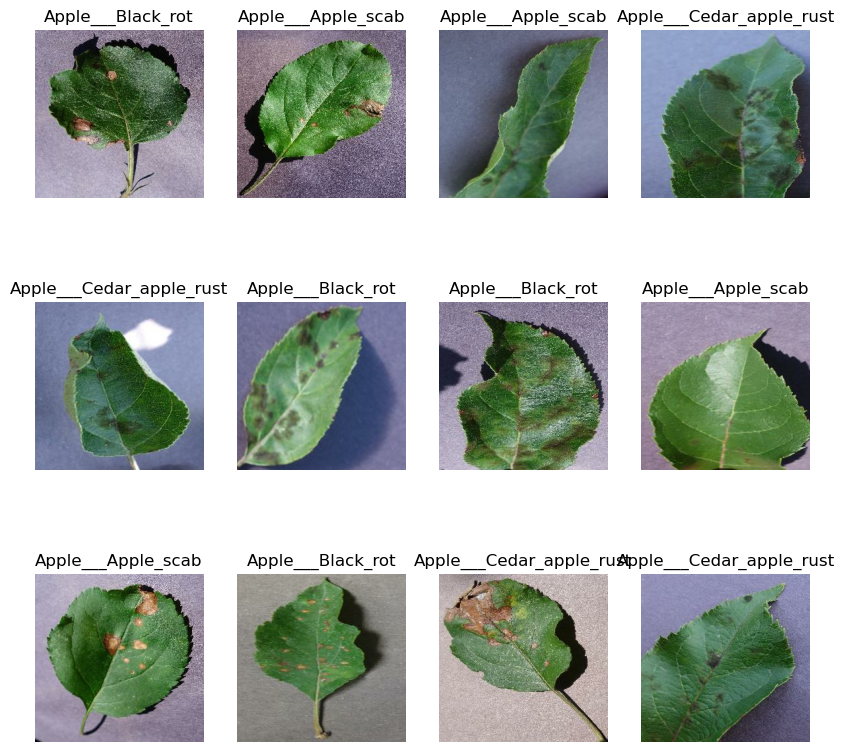

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classname[labels_batch[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 2 2 1 1 0 0 1 2 2 0 1 1 0 1 1 1 0 0 0 2 2 1 2 2 0 0 2 0 2]


In [29]:
class_names = dataset.class_names

output_dir = "LabeledImages"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [33]:
for image_batch, label_batch in dataset:
    for i in range(len(image_batch)):

        label = class_names[label_batch[i]]

        img = tf.keras.preprocessing.image.array_to_img(image_batch[i])

        filename = f"{label}_{i}.jpg"
        img.save(os.path.join(output_dir, filename))

        augmented_img = data_augmentation(tf.expand_dims(image_batch[i], axis=0))
        augmented_img = tf.keras.preprocessing.image.array_to_img(tf.squeeze(augmented_img, axis=0))

        augmented_filename = f"{label}_{i}_aug.jpg"
        augmented_img.save(os.path.join(output_dir, augmented_filename))

print(f"All images (original and augmented) saved to {output_dir}")

All images (original and augmented) saved to LabeledImages


Processing: LabeledImages\Apple___Apple_scab_0.jpg


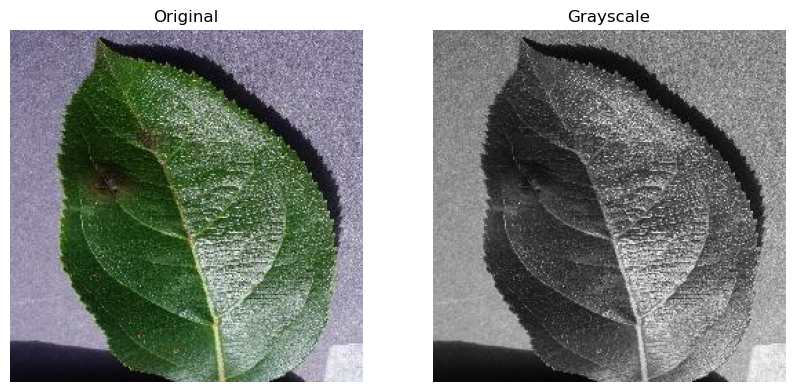

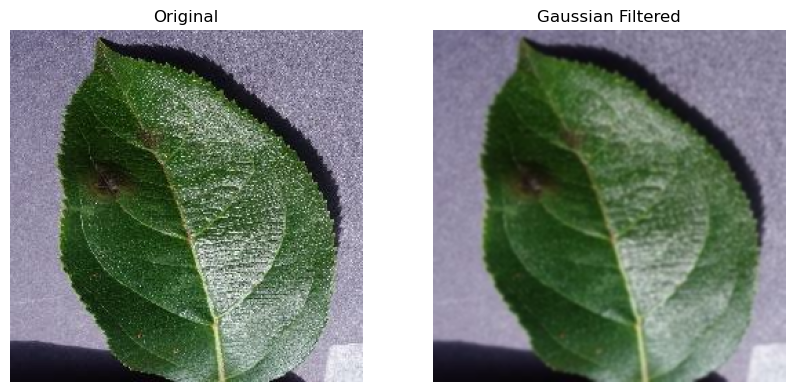

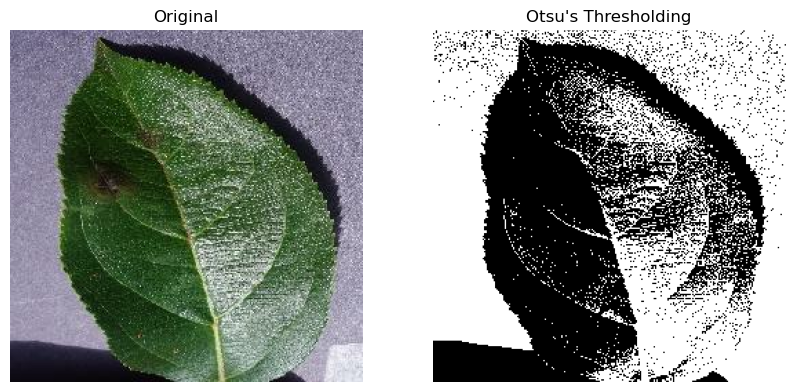

Processing: LabeledImages\Apple___Apple_scab_0_aug.jpg


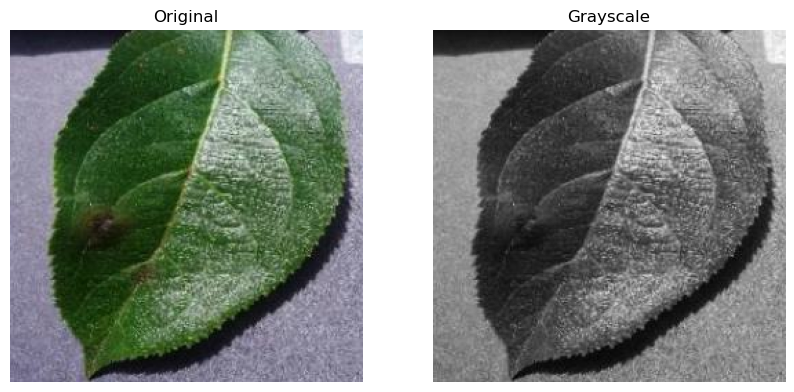

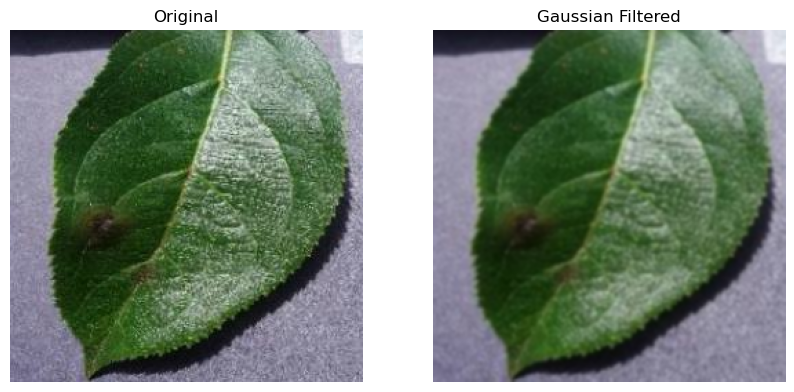

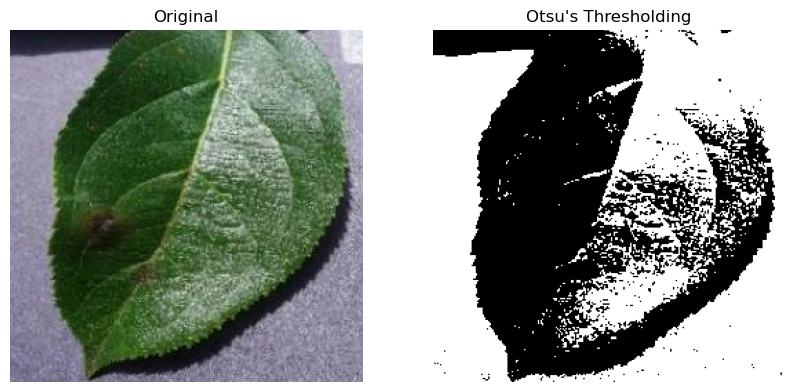

Processing: LabeledImages\Apple___Apple_scab_1.jpg


KeyboardInterrupt: 

In [15]:
image_dir = "LabeledImages" 

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    return img

def plot_image(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")

    # Processed image
    plt.subplot(1, 2, 2)
    if len(processed.shape) == 2:  # Grayscale or binary image
        plt.imshow(processed, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    plt.show()

# 1. Grayscale Conversion
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# 2. Gaussian Filtering
def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred

# 3. Otsu's Thresholding
def otsu_thresholding(image):
    gray = convert_to_grayscale(image)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

# Traverse all images in the directory and apply processing
def process_images_from_directory(image_dir):
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Add more extensions if needed
                image_path = os.path.join(root, file)
                print(f"Processing: {image_path}")
                
                # Load the image
                image = load_image(image_path)

                # Apply Grayscale Conversion
                gray_image = convert_to_grayscale(image)
                plot_image(image, gray_image, "Original", "Grayscale")

                # Apply Gaussian Filtering
                blurred_image = apply_gaussian_filter(image)
                plot_image(image, blurred_image, "Original", "Gaussian Filtered")

                # Apply Otsu's Thresholding
                binary_image = otsu_thresholding(image)
                plot_image(image, binary_image, "Original", "Otsu's Thresholding")

# Run the processing function on the dataset folder
process_images_from_directory(image_dir)